# Dimensionality Reduction using an Autoencoder in Python 
Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.

## Some Prerequisites
- Basic-to-intermediate level understanding of Python
- Basic theory of neural networks is beneficial, but not required

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE




## Talking points
- Intro
- Rhyme layout
- Emailed final file
- Imports

<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [4]:
X, y = make_blobs(
                  n_features=50, centers=20, 
                  n_samples=20000, cluster_std=0.2, 
                  random_state=17, center_box=[-1, 1]
                 )

In [5]:
X.shape

(20000, 50)

In [6]:
y.shape

(20000,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.10,
                                                    random_state=17)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='task3'></a>
# Task 3: Baseline Model

Let's check the initial shape of `X_test` before using `PCA` method.

In [23]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = X_test[y_test==unique_label]
df = pd.DataFrame(X_data)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.215712,0.444557,0.469427,0.615302,0.508996,0.569492,0.295179,0.547019,0.297725,0.189964,...,0.503059,0.563657,0.603844,0.187213,0.688067,0.293301,0.301133,0.199199,0.339893,0.392612
1,0.230403,0.191292,0.347253,0.661383,0.535278,0.527629,0.409843,0.593567,0.315872,0.205491,...,0.516587,0.476382,0.752351,0.278182,0.661648,0.279768,0.298830,0.283914,0.359660,0.447385
2,0.267510,0.342398,0.400246,0.627106,0.445006,0.517414,0.433896,0.644735,0.241377,0.311144,...,0.639868,0.695131,0.626998,0.145180,0.784734,0.331603,0.276997,0.254478,0.284248,0.464292
3,0.279046,0.274191,0.273335,0.722668,0.599699,0.501885,0.243721,0.629040,0.156162,0.224756,...,0.626547,0.508529,0.664920,0.150158,0.729592,0.284417,0.333553,0.287366,0.359390,0.484469
4,0.387543,0.275300,0.506769,0.670212,0.534579,0.567450,0.310046,0.562364,0.290008,0.209065,...,0.647545,0.741379,0.669730,0.208058,0.653730,0.316418,0.229465,0.384716,0.348898,0.538139


Now we use `PCA` to train on `X_train` and then we check our model for `X_test`

Text(0.5, 1.0, 'PCA Results')

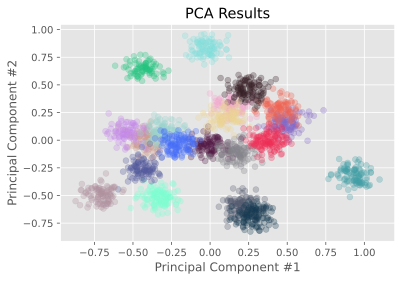

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train)

X_test_pca = pca.transform(X_test)

unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    X_data = X_test_pca[y_test==unique_label]
    plt.scatter(X_data[:,0], X_data[:,1], alpha=0.3, c=cols[index])
    
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA Results')

<a id='task4'></a>
# Task 4: Autoencoder Theory and Training
![title](Images/ae_viz.pdf)

In [11]:
autoencoder = MLPRegressor(alpha=1e-15, 
                           hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50), 
                           random_state=1, max_iter=20000)

autoencoder.fit(X_train, X_train)

MLPRegressor(alpha=1e-15, hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             max_iter=20000, random_state=1)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [19]:
W = autoencoder.coefs_
biases = autoencoder.intercepts_

In [20]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [21]:
def encoder(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b 
        else:
            res_ae = np.maximum(0, res_ae@w+b)
    return res_ae
            
res_ae = encoder(encoder_weights, encoder_biases, X_test)

Text(0.5, 1.0, 'Autoencoder Results')

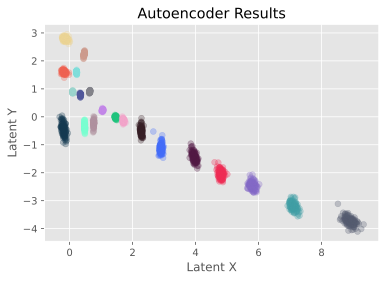

In [22]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]
    plt.scatter(latent_space[:,0], latent_space[:,1], alpha=0.3, c=cols[index])

plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

In [16]:
silhouette_score(X_train, y_train)

0.6109772034818249

In [17]:
silhouette_score(res_pca, y_test)

0.3678946554858417

In [18]:
silhouette_score(res_ae, y_test)

0.8074659601965325